# Implementing a Simple Neural Network with Numpy

Based on CS231n notes [here](http://cs231n.github.io/neural-networks-case-study/)

In [1]:
import sys
sys.version

'3.6.3 |Anaconda, Inc.| (default, Nov  8 2017, 15:10:56) [MSC v.1900 64 bit (AMD64)]'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

In [3]:
debug = False

### Hyperparameters ###

# N is number of samples
# D_in in input dimension
# D_h is hidden dimension
# D_out is output dimension

# start out small
N, D_in, D_hid, D_out = 50, 2, 10, 2
learning_rate = 1e-2

### Data ###
X, y = make_blobs(n_samples=N, centers=2, n_features=D_in,
                  random_state=0)

### Weights ###
W1 = np.random.randn(D_in, D_hid)
W2 = np.random.randn(D_hid, D_out)

if debug:
    print('X: ', X)
    print('y: ', y)
    print('w1: ', W1)
    print('w2: ', W2)

# Vector to which loss over training is saved
loss_vec = []

# Epochs
epochs = 100

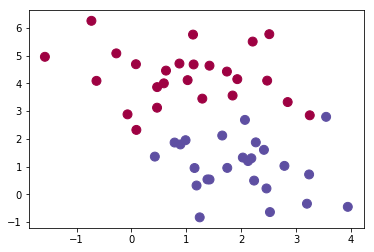

In [4]:
### Visualize data ###
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=plt.cm.Spectral)
plt.show()

In [5]:
### Train neural net ###
for t in range(epochs):
    ### Forward pass ###
    h = X.dot(W1)
    # apply an activation function (ReLU) to the output of first layer
    h_relu = np.maximum(0, h)
    # predict with these weights
    y_pred = np.array([np.argmax(x) for x in h_relu.dot(W2)]).reshape(-1, 1)
    
    ### Loss ###
    # - calculates the error in the network, cross-entropy, here
    # - different loss functions are used for different tasks
    # - in general, this process is done until the loss has reached a minima
    
    # calculate class scores
    scores = np.dot(h_relu, W2)
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    # compute the loss: average cross-entropy loss
    correct_logprobs = -np.log(probs[range(N), y])
    loss = np.sum(correct_logprobs) / N
    
    # compute the gradient on scores
    dscores = probs
    dscores[range(N), y] -= 1
    dscores /= N
    
    ### Backpropagation  ###
    # - gradients of W1 and W2 with respect to loss
    # - typically a gradient is the partial derivative of
    #   the loss function with respect to the weights
    # - normally an optimization function is used to calculate the graidents
    
    # backpropate the gradient to the parameters
    # first backprop into parameters W2
    dW2 = np.dot(h_relu.T, dscores)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[h_relu <= 0] = 0
    # finally into w
    dW1 = np.dot(X.T, dhidden)
    
    ### Updates to weights ###
    # - typically weigts are modified according to an optimization function
    # - the gradient gives the direction and the learning rate equates to
    #   the size of the step
    # - weights are modified in the opposite direction of the gradient
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    
    if debug:
        print('Forward pass:', h)
        print('Activation function:', h_relu)
        print('Current prediction:', y_pred)
        print('Loss:', t, loss)
        print('New weights 1: ', W1, '\n', 'New weights 2: ', W2)
        
    loss_vec.append(loss)

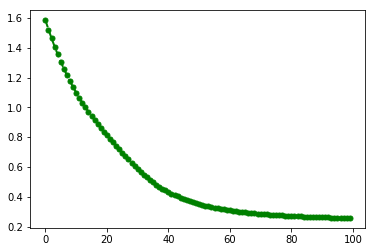

In [6]:
plt.plot(range(epochs), loss_vec, 'go--', linewidth=2, markersize=5)

(-1.82861894239374, 7.2513810576062685)

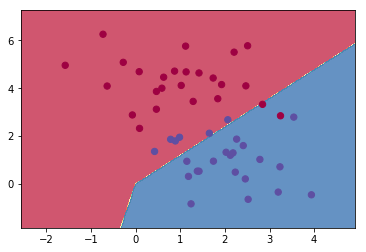

In [7]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1)), W2)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [8]:
### Evaluate ###
# evaluate training set accuracy
h_relu = np.maximum(0, np.dot(X, W1))
scores = np.dot(h_relu, W2)
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.84


## Further Reading

1. Nice article on loss functions and optimization/optimizers [Ref](https://medium.com/data-science-group-iitr/loss-functions-and-optimization-algorithms-demystified-bb92daff331c)